In [1]:
import pymysql,sys
import seaborn as sns
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
conn = pymysql.connect(host='localhost',user='root',passwd='pulsetini', db='nairaland',charset='utf8')
cur = conn.cursor()
cur2 = conn.cursor()

In [3]:
sns.set_style("white")
sns.despine()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})

###### Get all Posts

In [7]:
posts=pd.read_sql_query('select parent,time from posts3',conn)

In [14]:
for row in posts.iterrows():
    print row[1].values
    postComments=pd.read_sql_query('select time from comments3 where parent='+row[1].values[0],conn)
    sys.exit(1)

[u'1798361' Timestamp('2014-07-04 04:26:00')]


SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
for r in cur2:
    res=cur.execute('update posts2 set nComments='+str(r[1])+' where parent='+str(r[0]))
    cur.connection.commit()
    '''
    if not res==1:
        print '?',r,res
        sys.exit(1)
    '''

In [ ]:
cur.execute('select count(*) from comments group by parent')

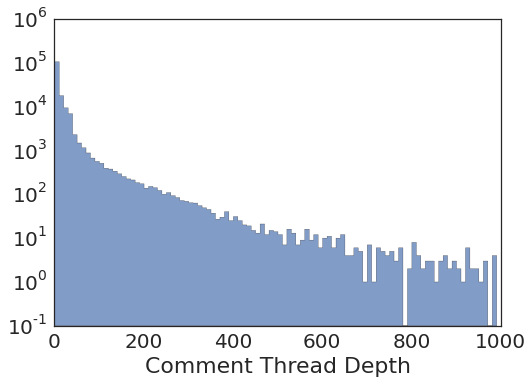

In [24]:
plt.hist([r[0] for r in cur],bins=[1+(i*10) for i in range(100)],log=True,histtype="stepfilled",alpha=0.7)
plt.xlabel('Comment Thread Depth')
plt.savefig('comment_dist.png',dpi=200)

###### User Degree Distribution

In [15]:
activeDegreeDf=pd.read_sql_query('select count(*) from following group by source',conn)
activeDegreeDf.columns=['degree']
inactiveDegreeDf=pd.read_sql_query('select count(*) from following_new group by source',conn)
inactiveDegreeDf.columns=['degree']

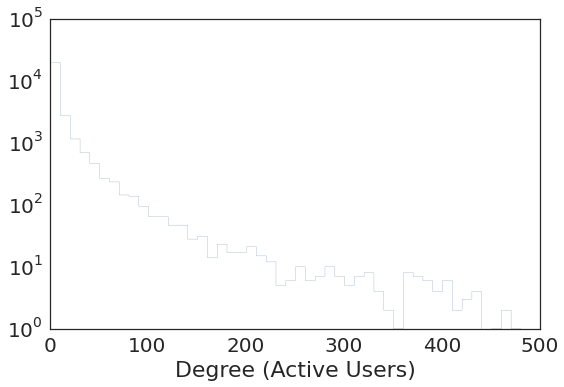

In [18]:
plt.hist(activeDegreeDf.degree.values,bins=[1+(i*10) for i in range(50)],log=True,histtype="step",alpha=0.7)
plt.xlabel('Degree (Active Users)')
plt.tight_layout()
plt.ylim(1,10**5)
plt.savefig('degree_dist.png',dpi=200)

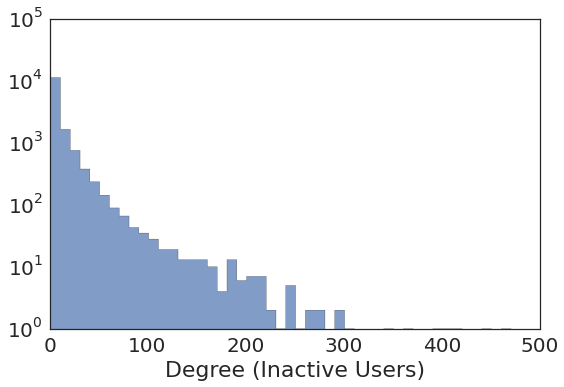

In [17]:
plt.hist(inactiveDegreeDf.degree.values,bins=[1+(i*10) for i in range(50)],log=True,histtype="stepfilled",alpha=0.7)
plt.xlabel('Degree (Inactive Users)')
plt.tight_layout()
plt.ylim(1,10**5)
plt.savefig('degree_dist.png',dpi=200)

In [29]:
?plt.hist

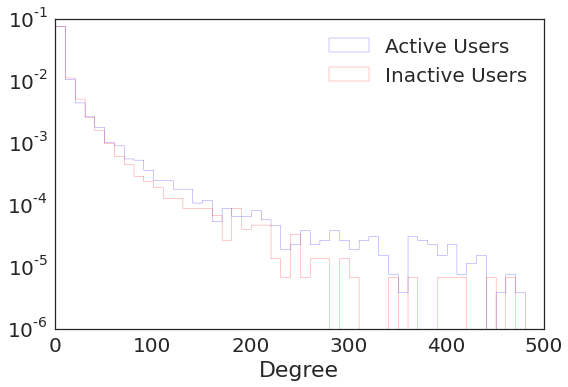

In [30]:
plt.hist(activeDegreeDf.degree.values,bins=[1+(i*10) for i in range(50)],normed=True,log=True,histtype="step",alpha=0.7,color='b',label='Active Users')
plt.hist(inactiveDegreeDf.degree.values,bins=[1+(i*10) for i in range(50)],normed=True,log=True,histtype="step",alpha=0.7,color='r',label='Inactive Users')
plt.xlabel('Degree')
plt.tight_layout()
plt.ylim(10**-6,0.1)
plt.legend()
plt.savefig('degree_dist.png',dpi=200)

###### Comment time distribution

In [4]:
comments=pd.read_sql_query('select time from comments',conn)
comments.index=pd.to_datetime(comments.time)
comments['hour']=comments.index.hour
comments['minute']=comments.index.minute
comments['hourminute']=comments.hour+((comments.minute)/60.0)
comments.hourminute[0:5].values
plt.hist(comments.hourminute[0:].values,bins=[(i*0.25) for i in range(24*4)],log=True,histtype="stepfilled",alpha=0.7)
plt.xlabel('Hour')
plt.tight_layout()
plt.ylim(10**3,10**5)
plt.xlim(-0.125,23.825)
plt.savefig('comments_hour_dist.png',dpi=200)
plt.show()

0

###### Post time distribution

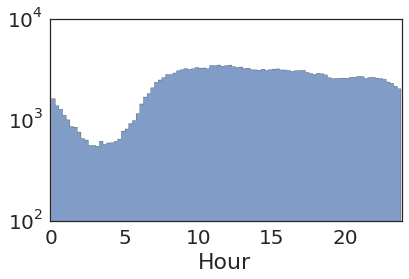

In [38]:
posts=pd.read_sql_query('select time from posts2',conn)
posts.index=pd.to_datetime(posts.time)
posts['hour']=posts.index.hour
posts['minute']=posts.index.minute
posts['hourminute']=posts.hour+((posts.minute)/60.0)
posts.hourminute[0:5].values
plt.hist(posts.hourminute[0:].values,bins=[(i*0.25) for i in range(24*4)],log=True,histtype="stepfilled",alpha=0.7)
plt.xlabel('Hour')
plt.tight_layout()
plt.ylim(10**2,10**4)
plt.xlim(-0.125,23.825)
plt.savefig('posts_hour_dist.png',dpi=200)
plt.show()

In [42]:
posts=pd.read_sql_query('select time from posts3',conn)

In [43]:
posts.index=posts.time

In [44]:
posts['dummy']=1

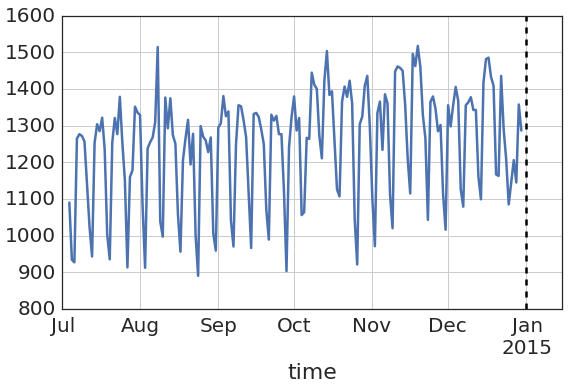

In [64]:
posts.resample('d',how='sum')['dummy'].plot()
plt.axvline(datetime.datetime(2015,1,1),color='k',linestyle='--')
plt.xlim(datetime.datetime(2014,7,1),datetime.datetime(2015,1,15))
plt.tight_layout()
plt.savefig('posts_time_series.png',dpi=250)

In [34]:
%time comments=pd.read_sql_query('select time from comments3',conn)

CPU times: user 1min 20s, sys: 514 ms, total: 1min 20s
Wall time: 1min 20s


In [35]:
%time commentsUpdated=pd.read_sql_query('select time from comments_updated_test',conn)

CPU times: user 3.07 s, sys: 44.2 ms, total: 3.12 s
Wall time: 3.1 s


In [36]:
comments.index=comments.time

In [37]:
commentsUpdated.index=commentsUpdated.time

In [38]:
comments['dummy']=1

In [39]:
commentsUpdated['dummy']=1

In [50]:
commentsTotal=pd.concat([comments,commentsUpdated])

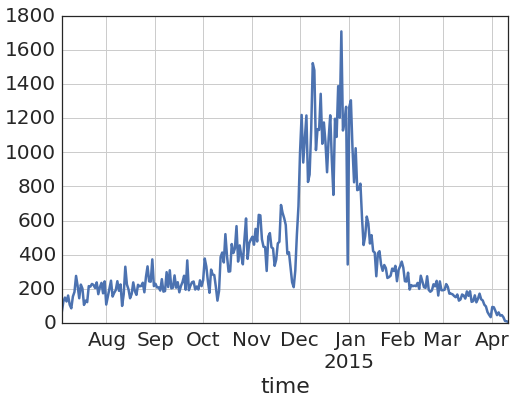

In [40]:
commentsUpdated.resample('d',how='sum')['dummy'].plot()

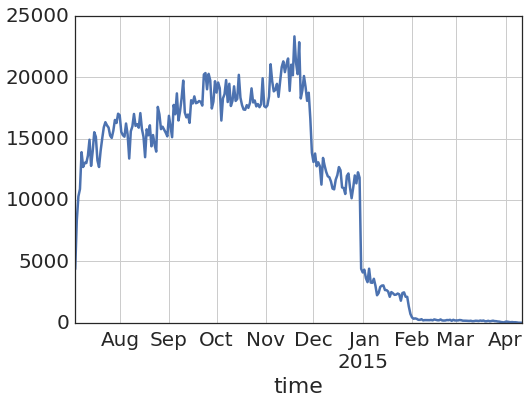

In [41]:
comments.resample('d',how='sum')['dummy'].plot()

In [54]:
import datetime

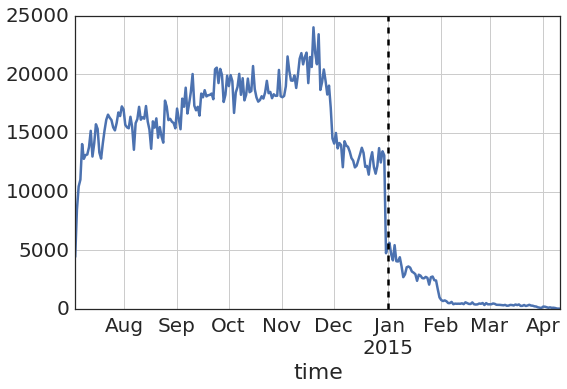

In [65]:
commentsTotal.resample('d',how='sum')['dummy'].plot()
plt.axvline(datetime.datetime(2015,1,1),color='k',linestyle='--')
plt.tight_layout()
plt.savefig('comments_time_series.png',dpi=250)

###Try to fix year on updated comments: should all be 2015

In [26]:
y=commentsUpdated.index[0]

In [21]:
import datetime

In [28]:
y.year=2015

AttributeError: attribute 'year' of 'datetime.date' objects is not writable